In [ ]:
import numpy as np
from numpy import sin,cos,tan
from math import pi
from IPython.display import clear_output
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

conv = 2*pi/360
A = 4
s = 5
h = 3

N = 6


def ratio(bet,alp,psi):
    bet,alp,psi = conv*bet,conv*alp,conv*psi
    
    xp =  (0.5*A*cos(alp)*tan(psi) + 0.5*sin(alp) + s*tan(bet))/(tan(bet) + tan(psi))
    yp = h + tan(bet)*((0.5*cos(alp)*tan(psi) + 0.5*sin(alp) + s*tan(bet))/(tan(bet) + tan(psi) ) - s) + s*tan(phi)
    
    xb = -0.5*cos(bet) + s
    yb = -0.5*cos(bet) + h
    
    d = np.sqrt( (xp - xb)**2 + (yp - yb)**2)
    
    m = (yb - yp)/(xb - xp)
    
    if (m < 0) and (d > A):
        S = 0
    elif (m < 0) and (d < A):
        S = 1 - d/A
    elif (m > 0):
        S = 1
    
    return S

def potencia(bet,alp,psi):
    bet,alp,psi = conv*bet,conv*alp,conv*psi
    #primera placa 
    P1 = A*sin(pi - psi - alp)
    #segunda placa con sombra
    P2 = ratio(bet,alp,psi)*sin(pi - psi - bet)
    return P1 + P2


def p_out(bet,alp,psi):
    bet,alp,psi = conv*bet,conv*alp,conv*psi
    bet = alp
    #primera placa 
    P1 = A*sin(pi - psi - alp)
    #segunda placa con sombra
    P2 = ratio(bet,alp,psi)*sin(pi - psi - bet)
    return P1 + P2




DF_ = []

for ph in range(N):
    phi = 5*ph*conv
    Bet,Alp,Psi,Cost,Cost_out = [],[],[],[],[]

    # b,a,p = np.linspace(-90*conv,90*conv,91),np.linspace(-90*conv,90*conv,91),np.linspace(1*conv,180*conv,181)

    b,a,p = np.arange(-90,95,10),np.arange(-90,95,10),np.arange(1,180,10)
    o = 0

    for i in p:
        for j in a:
            for k in b:
                o += 1
                Psi.append(i)
                Alp.append(j)
                Bet.append(k)
                Cost.append(potencia(k,j,i))
                Cost_out.append(p_out(k,j,i))
                print(ph,i,j,k,"---",o," / ",len(b)*len(a)*len(p))
                clear_output(wait=True)


    df = pd.DataFrame({
        'alpha':Alp,
        'beta':Bet,
        'psi':Psi,
        'P_out':Cost_out, 
        'P':Cost
    }).dropna()

    DF_.append(df[df.P > 0].reset_index(drop = True))

5 171 40 90 --- 6403  /  6498


In [ ]:
DF = []
for i in range(N):
    ang = np.unique(DF_[i].psi)
    opt_alpha,opt_beta,opt_psi,opt_P,opt_P_out = [],[],[],[],[]

    for a in ang:
        H = DF_[i][DF_[i].psi == a]
        opt=np.array(H.iloc[np.where(H.P == np.max(H.P))[0],:])[0]
        
        
        
        opt_alpha.append(opt[0])
        opt_beta.append(opt[1])
        opt_psi.append(opt[2])
        opt_P.append(opt[3])
        opt_P_out.append(opt[4])


    DF.append( pd.DataFrame({
        'opt_alp':opt_alpha,
        'opt_bet':opt_beta,
        'opt_Psi':opt_psi,
        'opt_P':opt_P,
        'opt_P_out':opt_P_out
    }))

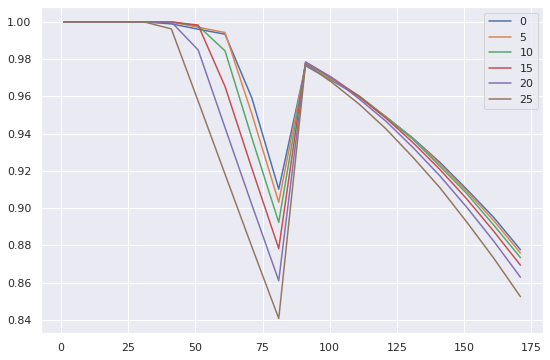

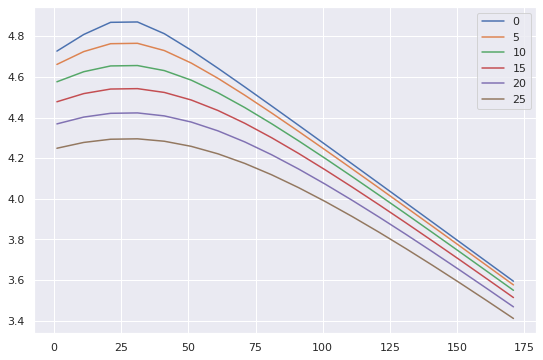

In [4]:
plt.figure(figsize = (9,6))    
plt.plot(DF[0].opt_Psi,DF[0].opt_P/DF[0].opt_P_out,label = "0") 

plt.plot(DF[1].opt_Psi,DF[1].opt_P/DF[1].opt_P_out,label = "5")
plt.plot(DF[2].opt_Psi,DF[2].opt_P/DF[2].opt_P_out,label = "10")
plt.plot(DF[3].opt_Psi,DF[3].opt_P/DF[3].opt_P_out,label = "15")
plt.plot(DF[4].opt_Psi,DF[4].opt_P/DF[4].opt_P_out,label = "20")
plt.plot(DF[5].opt_Psi,DF[5].opt_P/DF[5].opt_P_out,label = "25")
# plt.plot(DF[6].opt_Psi,DF[6].opt_P,label = "30")
# plt.plot(DF_[7].opt_Psi,DF_[7].opt_P,label = "35")
# plt.plot(DF[8].opt_Psi,DF[8].opt_P,label = "40")
plt.legend()
plt.show()

plt.figure(figsize = (9,6))    
plt.plot(DF[0].opt_Psi,DF[0].opt_P,label = "0") 

plt.plot(DF[1].opt_Psi,DF[1].opt_P,label = "5")
plt.plot(DF[2].opt_Psi,DF[2].opt_P,label = "10")
plt.plot(DF[3].opt_Psi,DF[3].opt_P,label = "15")
plt.plot(DF[4].opt_Psi,DF[4].opt_P,label = "20")
plt.plot(DF[5].opt_Psi,DF[5].opt_P,label = "25")
# plt.plot(DF[6].opt_Psi,DF[6].opt_P,label = "30")
# plt.plot(DF_[7].opt_Psi,DF_[7].opt_P,label = "35")
# plt.plot(DF[8].opt_Psi,DF[8].opt_P,label = "40")
plt.legend()
plt.show()


In [37]:
import time

def task():
    print('Sleeping for 0.5 seconds')
    time.sleep(0.5)
    print('Finished sleeping')

In [38]:
import multiprocessing
p1 = multiprocessing.Process(target=task)
p2 = multiprocessing.Process(target=task)

In [39]:
p1.start()
p2.start()

Sleeping for 0.5 seconds
Sleeping for 0.5 seconds
Finished sleeping
Finished sleeping


In [40]:
import multiprocessing
import time

def task():
    print('Sleeping for 0.5 seconds')
    time.sleep(0.5)
    print('Finished sleeping')

if __name__ == "__main__":
    start_time = time.perf_counter()

    # Creates two processes
    p1 = multiprocessing.Process(target=task)
    p2 = multiprocessing.Process(target=task)

    # Starts both processes
    p1.start()
    p2.start()

    finish_time = time.perf_counter()

    print(f"Program finished in {finish_time-start_time} seconds")

Program finished in 0.011297490000288235 seconds
Sleeping for 0.5 seconds
Sleeping for 0.5 seconds
Finished sleeping
Finished sleeping


In [ ]:
import multiprocessing
import time

def task():
    print('Sleeping for 0.5 seconds')
    time.sleep(0.5)
    print('Finished sleeping')

if __name__ == "__main__": 
    start_time = time.perf_counter()
    processes = []

    # Creates 10 processes then starts them
    for i in range(10):
        p = multiprocessing.Process(target = task)
        p.start()
        processes.append(p)
    
    # Joins all the processes 
    for p in processes:
        p.join()

    finish_time = time.perf_counter()

    print(f"Program finished in {finish_time-start_time} seconds")

Sleeping for 0.5 seconds
Sleeping for 0.5 secondsSleeping for 0.5 seconds

Sleeping for 0.5 secondsSleeping for 0.5 seconds

Sleeping for 0.5 secondsSleeping for 0.5 secondsSleeping for 0.5 seconds


Sleeping for 0.5 seconds
Sleeping for 0.5 seconds
Finished sleeping
Finished sleepingFinished sleeping

Finished sleepingFinished sleeping

Finished sleeping